# Project: Why Patients don't show up in thier appointment?

## Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

<a id='intro'></a>
## Introduction

Our dataset contains information about patients appointment and if they show up or not.
Our work will be focused on trying to know why patients don't show up and which factors have the most significant effect of the patient state of show up or NOT show up.
### Question seeking their answers through our analysis:
- What is the percentage of no-show?
- What is the relation between getting an SMS and no-show?
- What is the effect of age?
- What is the effect of scholarship on show/no-show?
- Is there a relation between the day of appointment and show/no-show?


In [263]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [264]:
#data loading
df = pd.read_csv('project1.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In previous cells, we loaded the data and viewed a subset of it.
Next, we will show some basic and foundational information about the data set like numer of rows and columns and a quick look about data set statistics.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In previous cell, we showed basic info about our dataset, from which we now know that it has 14 columns and 110527 rows.
Most of the columns are integers.
Some columns data types needs to be converted like
- ScheduleDay to be converted to date.
- AppointmentDay to be converted to date.


Next, we will check for nulls and duplicate rows in our dataset.

In [266]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

As we saw in previous cell, there are no null columns in our dataset, let's check for duplicates.

In [267]:
print("No. of duplicate rows are:", df.duplicated().sum())

No. of duplicate rows are: 0


As we have seen in previous cell there are no duplicated rows in our data set, let's check the age column to see if any data is un-logic.

In [268]:
age_zero_or_less = df[df['Age']<=0]
age_zero_or_less.shape

(3540, 14)

There are 3540 records of age zero, which will need to be fixed during data cleaning.

#### Repairing wrong values
- Set age to mean age if age is zero

In [269]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].map(lambda x: x if x > 0 else mean_age)

In [270]:
#Check that no age less than or equal to zero
age_zero_or_less = df[df['Age']<=0]
age_zero_or_less.shape

(0, 14)

Get week day of appointment day to check later if it has an effect of show/no-show

In [271]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning
#### Datatype conversion
- Convert ScheduledDay to datetime
- Convert AppointmentDay to datetime

In [272]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  float64            
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Now, we will get the weekday of the appointment day date to check later if it has any effect of show/no-show

In [273]:
df['WeekDay'] = df['AppointmentDay'].dt.dayofweek
df['WeekDay'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: WeekDay, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

Here, we will do our exploratory data analysis activities trying to answer our question about which factors affect the No-Show most.
We will do our answer by asnwering the following questions:
- What is the percentage of no-show?
- What is the relation between getting an SMS and no-show?
- What is the effect of age?
- What is the effect of scholarship on show/no-show?
- Is there a relation between the day of appointment and show/no-show?

### Q1: What is the percentage of no-show?
Here we will calculate the percentage of no-show to the whole dataset count.

In [274]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [275]:
df_show = df[df['No-show']=='No']
df_no_show = df[df['No-show']=='Yes']
percent = 100 * df_no_show['PatientId'].count()/df['PatientId'].count()
print(f'Percentage of "No-Show" is: {percent}')

Percentage of "No-Show" is: 20.193255946510806


As we see, percentage of No-Show is about 20%, let's see it in a graph

Text(0, 0.5, 'Count')

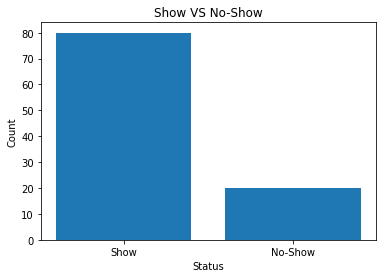

In [276]:
plt.bar(['Show','No-Show'],[80,20])
plt.title("Show VS No-Show")
plt.xlabel("Status")
plt.ylabel("Count")

### Q2: What is the relation between getting an SMS and no-show?
Does recieving an sms help patients come?Let's see.

In [277]:
get_sms_no_show = df_no_show[df_no_show['SMS_received']==1]['PatientId'].count()
not_sms_no_show = df_no_show[df_no_show['SMS_received']==0]['PatientId'].count()
print(f'Number of get SMS and no-show is:{get_sms_no_show} and numer of not get SMS and no-show is:{not_sms_no_show}')
print(f'Percentage of getting sms and no-show is: {100*get_sms_no_show / (get_sms_no_show + not_sms_no_show)}')

Number of get SMS and no-show is:9784 and numer of not get SMS and no-show is:12535
Percentage of getting sms and no-show is: 43.83708947533491


As we see, getting SMS has a small effecton show/no-show. let's show it on a per chart

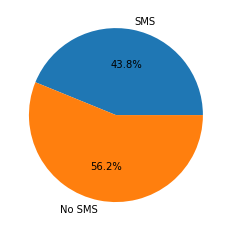

In [278]:
plt.pie([get_sms_no_show,not_sms_no_show],labels=["SMS","No SMS"],autopct='%1.1f%%')
plt.show()

### Q3: What the effect of age on No-Show?
Let's now check the age trend of no-show.

In [279]:
mean_no_show_age = df_no_show['Age'].mean()
print(f'Mean age of all patients is: {mean_age}, while mean age of no-show is: {mean_no_show_age}')

Mean age of all patients is: 37.08887421173107, while mean age of no-show is: 35.37953271299324


It seems that older patients tend to show more than younger ones.

### Q4: What is the effect of scholarship on show/no-show?
Let's examin the relation of being covered by sholarship on No-Show.
We will do this by following these steps:
- Get perntage of patients covered by sholarship on the whole data set.
- Get percentage of patients covered by sholarship and No-show.
- Compare the two values to see if there any effect of being covered toward show/no-show.

In [280]:
all_scholarship_patients = 100* df[df['Scholarship'] == 1]['PatientId'].count() / df['PatientId'].count()
no_show_scholarship_patients = 100* df_no_show[df_no_show['Scholarship'] == 1]['PatientId'].count() / df_no_show['PatientId'].count()
print(f'Percent of all coverd scholarship is:{all_scholarship_patients}')
print(f'Percent of No-Show and  coverd scholarship is:{no_show_scholarship_patients}' )


Percent of all coverd scholarship is:9.826558216544374
Percent of No-Show and  coverd scholarship is:11.55069671580268


As we see above, being covered by scholarship has a very small effect of No-Show.
We could view the the two values on bar chart as well.

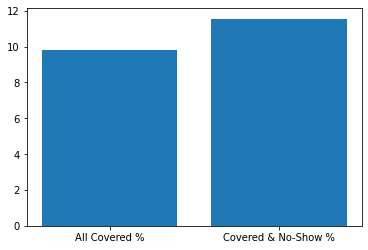

In [281]:
plt.bar(["All Covered %","Covered & No-Show %"],[all_scholarship_patients,no_show_scholarship_patients])
plt.show()

### Q5: Is there a specific day of the week with a wave of no-show?
Let's examine no-show distribution on week days to view if there any relation between a specific day and no-show.

In [282]:
df_no_show['WeekDay'].value_counts()

1    5152
2    5093
0    4690
4    4037
3    3338
5       9
Name: WeekDay, dtype: int64

In [283]:
df['WeekDay'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: WeekDay, dtype: int64

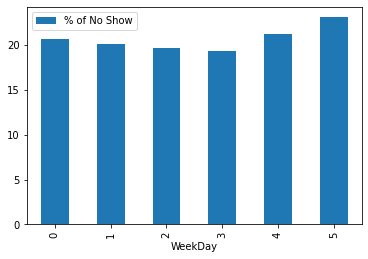

In [284]:
s_all = df.groupby(['WeekDay'])['PatientId'].count()
s_no_show = df_no_show.groupby(['WeekDay'])['PatientId'].count()
s_final = 100 *s_no_show/s_all
df_weekday = s_final.to_frame()
df_weekday.columns=['% of No Show']
df_weekday.plot(kind='bar')


As we see, these is no significance effect on no-show per day, though day(5) has the highest percentage of no-show and day(3) has the least.

<a id='conclusions'></a>
## Conclusions
- We have examined our dataset and tried to get the parameters that make patients not show at appointment.
- Our dataset has no duplicates or null values.
- The percentage of No-Show is about 20% of all scheduled appointments.
- The dataset has some coulumns that needed to be cleaned (convert to datetime and set age mean for zero ages).
- We didn't find a strong relation between (receive SMS, scholarship) and being not Show at appointment.
- We found that age has some effect of being show and elder people are more to show than younger.
- The day of appointment has very small effect of no-show.
- It seems that the dataset doens't have the columns that may affect the show state like if the patient has a job or not. 
